# Data Engineering Pipeline

Este notebook implementa um pipeline completo de engenharia de dados para análise e processamento do dataset fornecido.

## Estrutura do Pipeline:
1. **Setup e Instalação de Dependências**
2. **Carregamento e Análise Inicial dos Dados**  
3. **Análise Exploratória - Balanceamento de Classes**
4. **Pré-processamento dos Dados**
5. **Preparação para Modelagem**

## 1. Setup e Instalação de Dependências

Instalamos e importamos todas as bibliotecas necessárias para o pipeline de engenharia de dados:

In [3]:
%pip install seaborn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import joblib

Note: you may need to restart the kernel to use updated packages.


## 2. Carregamento e Análise Inicial dos Dados

Carregamos o dataset e fazemos uma primeira análise das suas características:

In [4]:
print("--- Etapa 1: Carregando e Analisando o Dataset Fornecido ---")
try:
	import pandas as pd  # Ensure pandas is imported
	df = pd.read_csv('dataset-IA.csv', sep=';')
	print("Dataset 'dataset-IA.csv' carregado com sucesso.")
except FileNotFoundError:
	print("Erro: O arquivo 'dataset-IA.csv' não foi encontrado.")
	exit()

df.columns = ['A1', 'B1', 'C1', 'A2', 'B2', 'C2', 'A3', 'B3', 'C3', 'Classe']
print("\nInformações do Dataset:")
df.info()

--- Etapa 1: Carregando e Analisando o Dataset Fornecido ---
Dataset 'dataset-IA.csv' carregado com sucesso.

Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A1      750 non-null    int64 
 1   B1      750 non-null    int64 
 2   C1      750 non-null    int64 
 3   A2      750 non-null    int64 
 4   B2      750 non-null    int64 
 5   C2      750 non-null    int64 
 6   A3      750 non-null    int64 
 7   B3      750 non-null    int64 
 8   C3      750 non-null    int64 
 9   Classe  750 non-null    object
dtypes: int64(9), object(1)
memory usage: 58.7+ KB


## 3. Análise Exploratória - Balanceamento de Classes

Verificamos a distribuição das classes no dataset para identificar possíveis desbalanceamentos:


--- Etapa 2: Verificando o Balanceamento das Classes ---
Classe
Fim de Jogo             250
Possibilidade de Fim    250
Tem Jogo                250
Name: count, dtype: int64

Após balanceamento: 750 amostras totais

Distribuição final:
Classe
Fim de Jogo             250
Possibilidade de Fim    250
Tem Jogo                250
Name: count, dtype: int64


C:\Users\danil\AppData\Local\Temp\ipykernel_11984\2070072337.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Classe', palette='viridis')


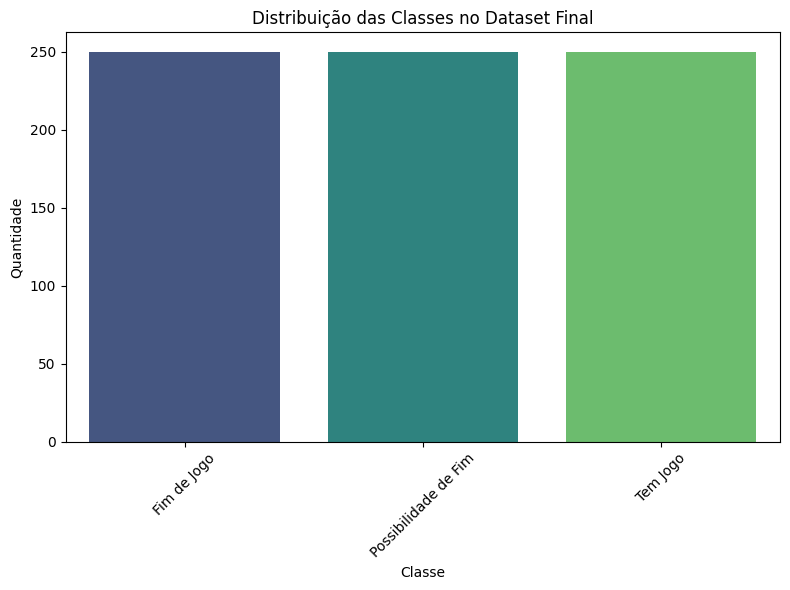


Dataset final: 750 amostras totais


In [5]:
print("\n--- Etapa 2: Verificando o Balanceamento das Classes ---")
class_counts = df['Classe'].value_counts()
print(class_counts)

# Limitando a 250 instâncias por classe conforme enunciado
max_samples_per_class = 250
df_balanced = pd.DataFrame()

for class_name in class_counts.index:
    class_data = df[df['Classe'] == class_name]
    if len(class_data) > max_samples_per_class:
        class_data = class_data.sample(n=max_samples_per_class, random_state=42)
    df_balanced = pd.concat([df_balanced, class_data], ignore_index=True)

# Atualizar o dataframe principal
df = df_balanced.copy()
print(f"\nApós balanceamento: {len(df)} amostras totais")

# Verificar nova distribuição
final_counts = df['Classe'].value_counts()
print("\nDistribuição final:")
print(final_counts)

# Visualizar a distribuição
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Classe', palette='viridis')
plt.title('Distribuição das Classes no Dataset Final')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('distribuicao_classes_carregado.png')
plt.show()

print(f"\nDataset final: {len(df)} amostras totais")

## 4. Pré-processamento e Divisão dos Dados

Realizamos a codificação das features categóricas e dividimos os dados em conjuntos de treino, validação e teste:

In [6]:
print("\n--- Etapa 3: Engenharia de Características e Divisão dos Dados ---")
X = df.drop('Classe', axis=1)
y = df['Classe']

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
import joblib

# One-Hot Encoding das features categóricas (posições do tabuleiro)
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_onehot = onehot_encoder.fit_transform(X)

# Label Encoding do target (classes de saída)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir os dados: 60% treino, 20% validação, 20% teste
X_temp, X_test, y_temp, y_test = train_test_split(
    X_onehot, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp  # 0.25 * 0.8 = 0.2
)

print(f"Conjunto de treino: {X_train.shape[0]} amostras")
print(f"Conjunto de validação: {X_val.shape[0]} amostras")
print(f"Conjunto de teste: {X_test.shape[0]} amostras")

# Salvar os conjuntos de dados
import pandas as pd
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train
train_df.to_csv('train_dataset.csv', index=False)

val_df = pd.DataFrame(X_val)
val_df['target'] = y_val
val_df.to_csv('validation_dataset.csv', index=False)

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test
test_df.to_csv('test_dataset.csv', index=False)

# Salvar os encoders
joblib.dump(onehot_encoder, 'onehot_encoder.joblib')
joblib.dump(label_encoder, 'label_encoder.joblib')

print("\nDatasets de treino, validação e teste foram salvos com sucesso!")


--- Etapa 3: Engenharia de Características e Divisão dos Dados ---
Conjunto de treino: 450 amostras
Conjunto de validação: 150 amostras
Conjunto de teste: 150 amostras

Datasets de treino, validação e teste foram salvos com sucesso!
